In [1]:
# Xinyu Zhang 1128 Q4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
# Data from Q1
data = {
    2013: 78.86815850290287,
    2014: 56.2361385890797,
    2015: 51.53462970291224,
    2016: 46.096841259665666,
    2017: 46.772274667615136,
    2018: 45.2665483914447,
    2019: 39.66561655259187,
    2020: 33.8064428953237,
    2021: 33.24782967557695
}

years = np.array(list(data.keys())).reshape(-1, 1)
disparities = list(data.values())

# Train data (2013 to 2019)
train_years = years[:-2]
train_disparities = disparities[:-2]

# Test data (2020 and 2021)
test_years = years[-2:]
actual_disparities = disparities[-2:]

# Create and train the model
model = LinearRegression()
model.fit(train_years, train_disparities)

# Predict disparities for 2020 and 2021
predicted_disparities = model.predict(test_years)

# Compare predictions with actual data
comparison = {
    "Year": ["2020", "2021"],
    "Predicted Disparity": predicted_disparities,
    "Actual Disparity": actual_disparities
}

comparison


{'Year': ['2020', '2021'],
 'Predicted Disparity': array([31.44729234, 26.29339372]),
 'Actual Disparity': [33.8064428953237, 33.24782967557695]}

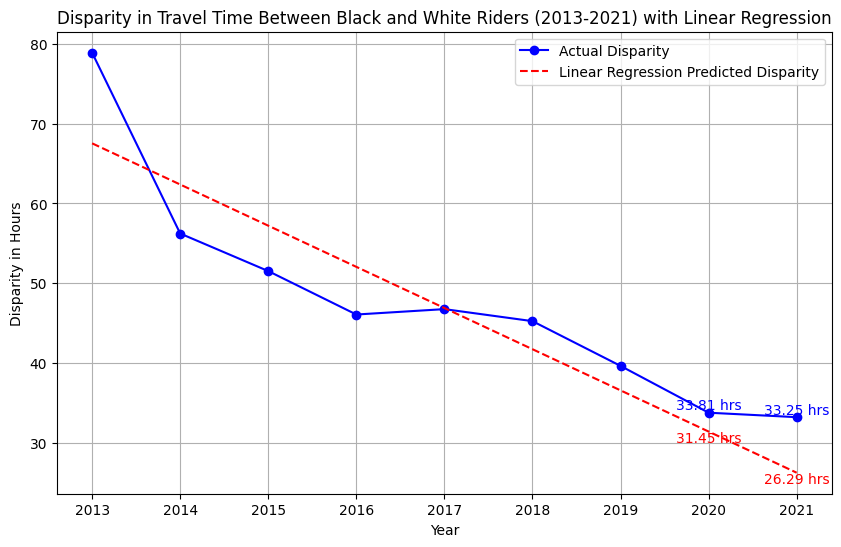

In [18]:
# Extracting the years and values for plotting
years = list(data.keys())
actual_disparities = list(data.values())

# Generate predictions for all years for a smoother curve
predicted_years = np.arange(2013, 2022).reshape(-1, 1)
lr_predicted_all_years = model.predict(predicted_years)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, actual_disparities, label="Actual Disparity", marker='o', color='blue')
plt.plot(predicted_years, lr_predicted_all_years, label="Linear Regression Predicted Disparity", linestyle='--', color='red')

# Adding data labels for the years 2020 and 2021
for i in range(len(test_years)):
    plt.text(test_years[i], actual_disparities[-2:][i], f"{actual_disparities[-2:][i]:.2f} hrs", horizontalalignment='center', verticalalignment='bottom', color='blue')
    plt.text(test_years[i], predicted_disparities[-2:][i], f"{predicted_disparities[-2:][i]:.2f} hrs", horizontalalignment='center', verticalalignment='top', color='red')

# Adding labels and title
plt.xlabel("Year")
plt.ylabel("Disparity in Hours")
plt.title("Disparity in Travel Time Between Black and White Riders (2013-2021) with Linear Regression")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [28]:
# Calculate the percentage difference between actual and predicted values
percentage_2020 = abs((actual_disparities[-2] - predicted_disparities[-2]) / actual_disparities[-2]) * 100
percentage_2021 = abs((actual_disparities[-1] - predicted_disparities[-1]) / actual_disparities[-1]) * 100

print(f"Percentage difference in disparity between actual and predicted values for 2020: {percentage_2020:.2f}%")
print(f"Percentage difference in disparity between actual and predicted values for 2021: {percentage_2021:.2f}%")

Percentage difference in disparity between actual and predicted values for 2020: 6.98%
Percentage difference in disparity between actual and predicted values for 2021: 20.92%


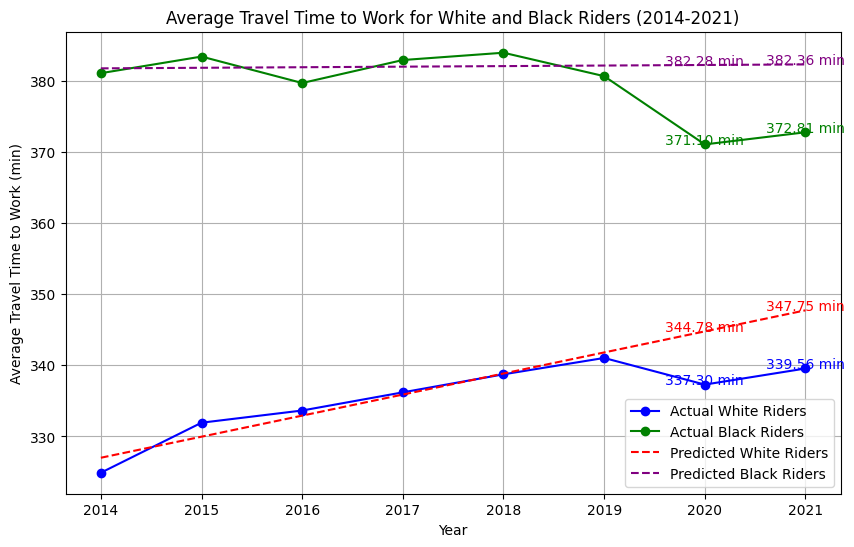

{'Year': ['2020', '2021'],
 'Predicted White Riders Time': array([344.784137  , 347.74828187]),
 'Predicted Black Riders Time': array([382.28133646, 382.36029788]),
 'Actual White Riders Time': [337.29556074766356, 339.5608513189448],
 'Actual Black Riders Time': [371.10200364298726, 372.80868099452175]}

In [21]:
# Data for average travel time to work for Black and White riders from 2014 to 2021
data = {
    '2014, RAC1P=1': 324.8910675381264,
    '2014, RAC1P=2': 381.1272061272061,
    '2015, RAC1P=1': 331.9309787626962,
    '2015, RAC1P=2': 383.46560846560845,
    '2016, RAC1P=1': 333.647201105736,
    '2016, RAC1P=2': 379.74404236540164,
    '2017, RAC1P=1': 336.20532145711996,
    '2017, RAC1P=2': 382.9775961247351,
    '2018, RAC1P=1': 338.7404149751917,
    '2018, RAC1P=2': 384.0069633666364,
    '2019, RAC1P=1': 341.0427958446251,
    '2019, RAC1P=2': 380.708412397217,
    '2020, RAC1P=1': 337.29556074766356,
    '2020, RAC1P=2': 371.10200364298726,
    '2021, RAC1P=1': 339.5608513189448,
    '2021, RAC1P=2': 372.80868099452175
}

# Separate data for White and Black riders
white_data = {int(year.split(",")[0]): time for year, time in data.items() if "RAC1P=1" in year}
black_data = {int(year.split(",")[0]): time for year, time in data.items() if "RAC1P=2" in year}

# Prepare the dataset
years = np.array(list(white_data.keys())).reshape(-1, 1)
white_times = list(white_data.values())
black_times = list(black_data.values())

# Train data (2014 to 2019)
train_years = years[:-2]
train_white_times = white_times[:-2]
train_black_times = black_times[:-2]

# Test data (2020 and 2021)
test_years = years[-2:]

# Create and train the models
white_model = LinearRegression()
black_model = LinearRegression()
white_model.fit(train_years, train_white_times)
black_model.fit(train_years, train_black_times)

# Predict travel times for 2020 and 2021
predicted_white_times = white_model.predict(test_years)
predicted_black_times = black_model.predict(test_years)

# Generate predictions for all years for a smoother curve
predicted_years = np.arange(2014, 2022).reshape(-1, 1)
predicted_white_all_years = white_model.predict(predicted_years)
predicted_black_all_years = black_model.predict(predicted_years)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, white_times, label="Actual White Riders", marker='o', color='blue')
plt.plot(years, black_times, label="Actual Black Riders", marker='o', color='green')
plt.plot(predicted_years, predicted_white_all_years, label="Predicted White Riders", linestyle='--', color='red')
plt.plot(predicted_years, predicted_black_all_years, label="Predicted Black Riders", linestyle='--', color='purple')

# Adding data labels for predicted times in 2020 and 2021
for i, year in enumerate(test_years.flatten()):
    plt.text(year, predicted_white_times[i], f"{predicted_white_times[i]:.2f} min", horizontalalignment='center', color='red')
    plt.text(year, predicted_black_times[i], f"{predicted_black_times[i]:.2f} min", horizontalalignment='center', color='purple')
    plt.text(year, white_times[-2:][i], f"{white_times[-2:][i]:.2f} min", horizontalalignment='center', color='blue')
    plt.text(year, black_times[-2:][i], f"{black_times[-2:][i]:.2f} min", horizontalalignment='center', color='green')
# Adding labels and title
plt.xlabel("Year")
plt.ylabel("Average Travel Time to Work (min)")
plt.title("Average Travel Time to Work for White and Black Riders (2014-2021)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Outputting the new predictions
predictions_comparison = {
    "Year": ["2020", "2021"],
    "Predicted White Riders Time": predicted_white_times,
    "Predicted Black Riders Time": predicted_black_times,
    "Actual White Riders Time": white_times[-2:],
    "Actual Black Riders Time": black_times[-2:]
}

predictions_comparison